# Results Structure

Please ask Nine for `ExtractedLandmarks.zip`

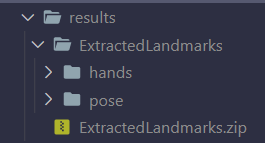

# Code

In [3]:
from os import listdir
from os.path import isfile, join

In [4]:
path = './results/ExtractedLandmarks/'

In [7]:
hand_path = path+'hands/'
hand_files = [f for f in listdir(hand_path) if isfile(join(hand_path, f))]
hand_files_denormalized = [f for f in hand_files if "denormalized" in f]
hand_files_normalized = [f for f in hand_files if "denormalized" not in f]

In [15]:
pose_path = path+'pose/'
pose_files = [f for f in listdir(pose_path) if isfile(join(pose_path, f))]
pose_files_denormalized = [f for f in pose_files if "denormalized" in f]
pose_files_normalized = [f for f in pose_files if "denormalized" not in f]

In [23]:
mapping_file = './resources/Class_mapping.txt'
ctol = {}
ltoc = {}
with open(mapping_file) as f:
    for line in f:
        (key, val) = line.split()
        ctol[int(key)] = val
        ltoc[val] = int(key)

In [18]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np

In [20]:
hand_index = np.arange(0, 21)
body_index = np.arange(0, 25)

In [ ]:
class LandmarksDataset(Dataset):
    """Hand Landmarks dataset."""

    def __init__(self, hand_path, pose_path, file_names, hand_use_index, pose_use_index, sample_func, transform=None, **kwargs):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        super(HandLandmarksDataset, self).__init__()
        self.hand_path = hand_path
        self.pose_path = pose_path
        self.file_names = file_names
        self.hand_use_index = hand_use_index
        self.pose_use_index = pose_use_index
        self.sample_func = sample_func
        self.kwargs = kwargs
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_name = self.files[idx]
        hand_file = pd.read_csv(hand_path+file_name, header=None)
        pose_file = pd.read_csv(pose_path+file_name, header=None)
        hand = hand_file.iloc[:, self.hand_use_index].to_numpy()
        pose = pose_file.iloc[:, self.pose_use_index].to_numpy()
        data = np.concatenate((hand, pose), axis=1)
        
        # get label from file name
        y = file_name.split('_')[0]
        
        sample_x = self.sample_func(data, **self.kwargs)

        if self.transform:
            sample = self.transform(sample)

        return sample_x, y

In [48]:
def sample_data(data, len_sample):
    sample_idx = np.linspace(0, data.shape[0]-1, len_sample, dtype=int)
    return data[sample_idx]